# <b>College Student Placement Prediction – EDA & ML Modeling</b><br><br>

### This notebook explores and models factors influencing the placement of college students using a structured machine learning workflow. The dataset contains various features such as IQ, CGPA, internship experience, and more.<br><br>

### <b>DataSet File Used :</b> college_student_placement_dataset.csv <br><br>

### <b>Objectives of this project :</b>

#### - Perform data preprocessing and cleaning.
#### - Conduct Exploratory Data Analysis (EDA).
#### - Detect and handle missing values and duplicates.
#### -Perform Feature Engineering and Encoding.
#### -Apply Feature Scaling where appropriate.
#### -Train various ML classification models.
#### -Compare performance to identify the best model.
<br><br>


In [ ]:
# Importing essential libraries for Data Processing

# Data Manipulation and Analysis
import numpy as np              # For numerical computations
import pandas as pd            # For data manipulation and analysis

# Data Visualization
import matplotlib.pyplot as plt    # For plotting basic graphs
import seaborn as sns              # For statistical data visualization

# Suppress Warnings for Cleaner Output During Execution
import warnings
warnings.filterwarnings('ignore')

# Exploring Files in a Directory Using os.walk()
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/college-student-placement-factors-dataset/college_student_placement_dataset.csv


In [ ]:
# Loading the Dataset
df=pd.read_csv('/kaggle/input/college-student-placement-factors-dataset/college_student_placement_dataset.csv')

In [ ]:
### Exploratory Data Analysis (EDA) & Data Preprocessing

In [ ]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [ ]:
# Checking Data types and non-null counts in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [ ]:
# Checking total number of duplicate rows:
duplicate_row_count = df.duplicated().sum()
print(f"Total number of duplicate rows: {duplicate_row_count}")

Total number of duplicate rows: 0


In [ ]:
# Drop identifier column
df.drop(columns=['College_ID'], inplace=True)

In [ ]:
# Show statistical summary for numeric columns (mean, std, min, max, etc.)
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


In [ ]:
# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,No,8,8,4,No
1,97,5.52,5.37,8,No,7,8,0,No
2,109,5.36,5.83,9,No,3,1,1,No
3,122,5.47,5.75,6,Yes,1,6,1,No
4,96,7.91,7.69,7,No,8,10,2,No


In [ ]:
# Feature Encoding

# Convert target column 'Placement' to numerical using Label Encoding (Yes/No → 1/0)
le = LabelEncoder()

df['Placement'] = le.fit_transform(df['Placement'])

df['Internship_Experience'] = le.fit_transform(df['Internship_Experience'])


Column: IQ
Q1 (25th percentile): 89.00
Q3 (75th percentile): 110.00
IQR: 21.00
Lower Bound: 57.50
Upper Bound: 141.50
Number of Outliers: 61


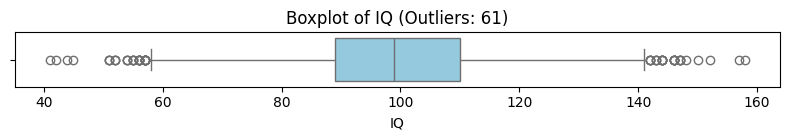


Column: Prev_Sem_Result
Q1 (25th percentile): 6.29
Q3 (75th percentile): 8.79
IQR: 2.50
Lower Bound: 2.54
Upper Bound: 12.54
Number of Outliers: 0


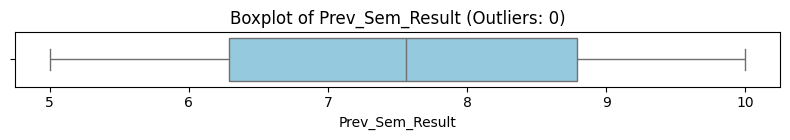


Column: CGPA
Q1 (25th percentile): 6.29
Q3 (75th percentile): 8.77
IQR: 2.48
Lower Bound: 2.57
Upper Bound: 12.49
Number of Outliers: 0


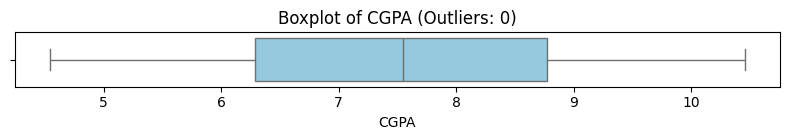


Column: Academic_Performance
Q1 (25th percentile): 3.00
Q3 (75th percentile): 8.00
IQR: 5.00
Lower Bound: -4.50
Upper Bound: 15.50
Number of Outliers: 0


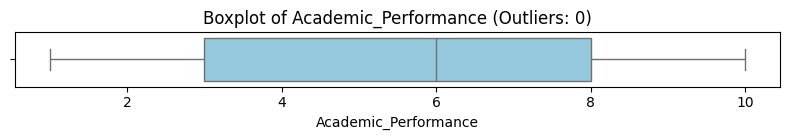


Column: Internship_Experience
Q1 (25th percentile): 0.00
Q3 (75th percentile): 1.00
IQR: 1.00
Lower Bound: -1.50
Upper Bound: 2.50
Number of Outliers: 0


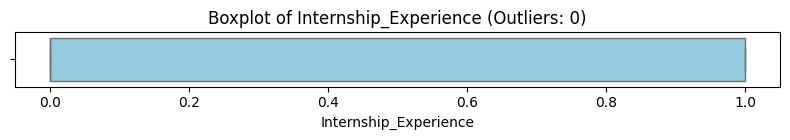


Column: Extra_Curricular_Score
Q1 (25th percentile): 2.00
Q3 (75th percentile): 8.00
IQR: 6.00
Lower Bound: -7.00
Upper Bound: 17.00
Number of Outliers: 0


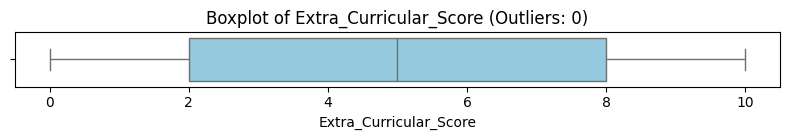


Column: Communication_Skills
Q1 (25th percentile): 3.00
Q3 (75th percentile): 8.00
IQR: 5.00
Lower Bound: -4.50
Upper Bound: 15.50
Number of Outliers: 0


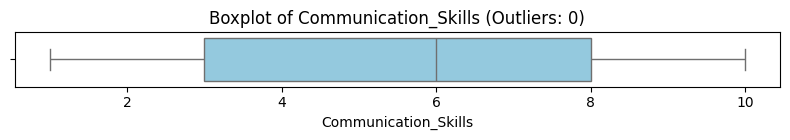


Column: Projects_Completed
Q1 (25th percentile): 1.00
Q3 (75th percentile): 4.00
IQR: 3.00
Lower Bound: -3.50
Upper Bound: 8.50
Number of Outliers: 0


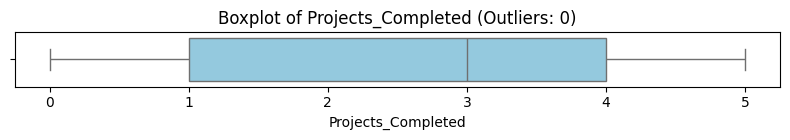


Column: Placement
Q1 (25th percentile): 0.00
Q3 (75th percentile): 0.00
IQR: 0.00
Lower Bound: 0.00
Upper Bound: 0.00
Number of Outliers: 1659


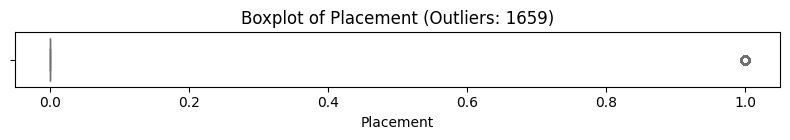

In [ ]:
# Univariate Analysis (Single Variable)
# IQR-based Outlier Detection Function
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers, Q1, Q3, lower_bound, upper_bound

for col in df.columns:
    print(f"\n{'='*60}")
    print(f"Column: {col}")

    # Detect outliers
    outliers, Q1, Q3, lower, upper = detect_outliers_iqr(df, col)

    # Summary Output
    print(f"Q1 (25th percentile): {Q1:.2f}")
    print(f"Q3 (75th percentile): {Q3:.2f}")
    print(f"IQR: {Q3 - Q1:.2f}")
    print(f"Lower Bound: {lower:.2f}")
    print(f"Upper Bound: {upper:.2f}")
    print(f"Number of Outliers: {len(outliers)}")

    # Visual: Boxplot
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col} (Outliers: {len(outliers)})')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

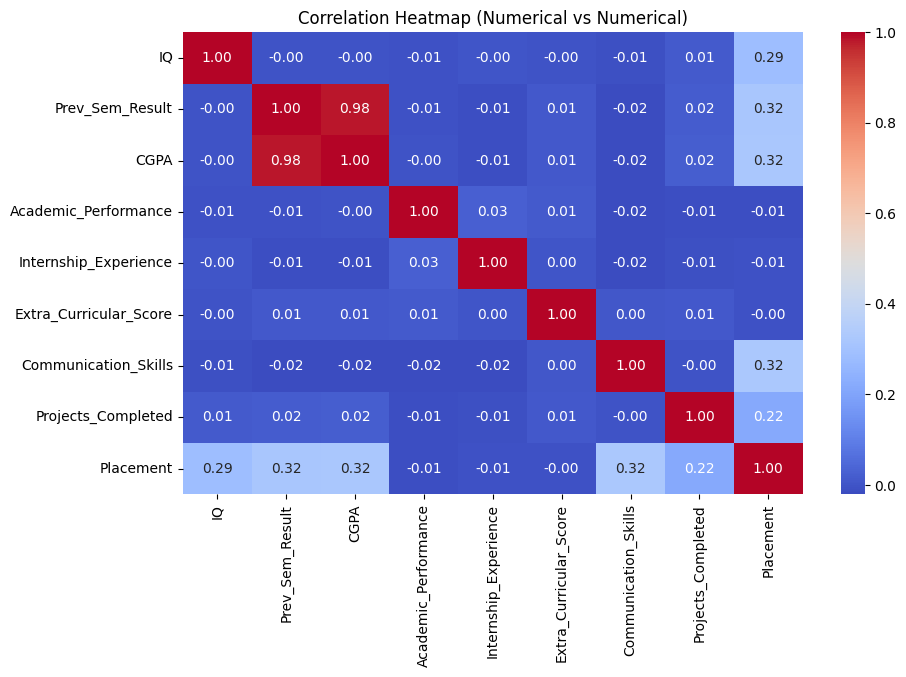

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[df.columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical vs Numerical)")
plt.show()

In [ ]:
# Separate features and target
X = df.drop(columns=['Placement'])
Y = df['Placement']

In [ ]:
# Perform stratified split to ensure class distribution in 'Placement' is preserved across training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42,
    stratify=Y  # Maintains the original proportion of classes in the target variable
)

In [ ]:
# Feature scaling (Standardization)
from sklearn.preprocessing import StandardScaler

# Standardize features (zero mean, unit variance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use same scaler for test data

In [ ]:
# Model Training

# Importing essential libraries for Build ML model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Initializing a dictionary of classification models for training and evaluation
models = {
    "Logistic Regression": LogisticRegression(),                    # Linear model suitable for binary classification
    "Random Forest": RandomForestClassifier(),                      # Ensemble method using multiple decision trees (bagging)
    "Decision Tree": DecisionTreeClassifier(),                      # Single decision tree classifier
    "Support Vector Machine": SVC(probability=True),                # Effective in high-dimensional spaces
    "K-Nearest Neighbors": KNeighborsClassifier(),                  # Lazy learner based on distance metrics
    "Naive Bayes": GaussianNB(),                                    # Probabilistic model based on Bayes theorem
    "Gradient Boosting": GradientBoostingClassifier(),              # Boosting technique using sequential trees
    "AdaBoost": AdaBoostClassifier(),                               # Adaptive boosting model
    "Bagging": BaggingClassifier(),                                 # Bootstrap aggregating method
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),  # Optimized gradient boosting
    "LightGBM": LGBMClassifier(verbosity=-1)                                   # Fast, distributed gradient boosting
}

In [ ]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, Y_train)                         # Train the model
    Y_pred = model.predict(X_test)                      # Predict on test set
    acc = accuracy_score(Y_test, Y_pred)                # Calculate accuracy
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.9035
Random Forest Accuracy: 0.9995
Decision Tree Accuracy: 1.0000
Support Vector Machine Accuracy: 0.9575
K-Nearest Neighbors Accuracy: 0.9480
Naive Bayes Accuracy: 0.9035
Gradient Boosting Accuracy: 1.0000
AdaBoost Accuracy: 1.0000
Bagging Accuracy: 0.9990
XGBoost Accuracy: 1.0000
LightGBM Accuracy: 1.0000


### Conclusion :

#### Among all models, LightGBM, XGBoost, Gradient Boosting, AdaBoost, and Decision Tree achieved perfect accuracy (1.0000). However, LightGBM stands out as the best due to its high efficiency, faster training on large datasets, lower memory usage, and better generalization compared to others. It balances performance and scalability, making it a strong choice for production deployment.